# A comparison of previously calrep files and new calrep


In [1]:
# imports
import os
from pyMeasure import *

Importing Code.Utils.Names
Importing Code.DataHandlers.NISTModels
Importing Code.DataHandlers.GeneralModels
Importing Code.DataHandlers.TouchstoneModels
Importing Code.DataHandlers.XMLModels
Importing Code.DataHandlers.RadiCALModels
Importing Code.DataHandlers.ZipModels
Importing Code.DataHandlers.Translations
Importing Code.DataHandlers.StatistiCALModels
Importing Code.DataHandlers.MUFModels
Importing Code.Analysis.SParameter
Importing Code.InstrumentControl.Instruments
Importing Code.InstrumentControl.Experiments


In [2]:
raw_two_port_121399=TwoPortRawModel(os.path.join(r"C:\Share\Ck_Std_raw_ascii",'CTN208.L26_121399'))
# Here I change the metadata to make it a type N
raw_two_port_121399.metadata["Connector_Type_Measurement"]="N"
new_calrep_two_port=calrep(raw_two_port_121399)
old_calrep_two_port=TwoPortCalrepModel(os.path.join(r"C:\Share\ascii.dut\2014",'CTN208.asc'))

In [3]:
a=plot_calrep_comparision([old_calrep_two_port,new_calrep_two_port])

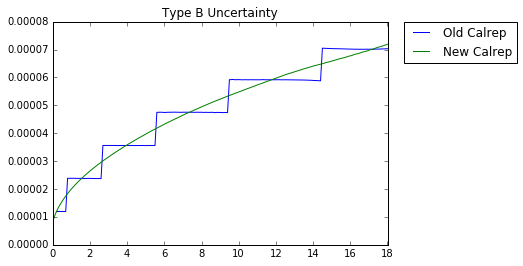

In [4]:
%matplotlib inline
#old_calrep.joined_table.column_names
type_b_figure=plt.figure("Type B Uncertainty")
plt.plot(old_calrep_two_port.joined_table["Frequency"],old_calrep_two_port.joined_table["uMbS21"],label="Old Calrep")
plt.plot(new_calrep_two_port["Frequency"],np.array(new_calrep_two_port["uMbS21"]),label="New Calrep")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Type B Uncertainty")

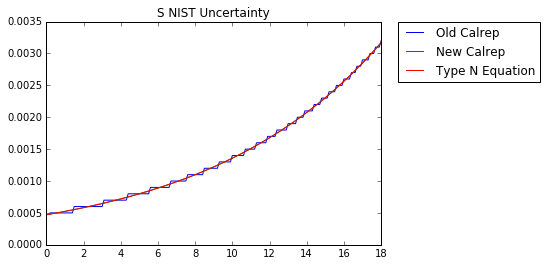

In [5]:
SNIST_figure=plt.figure("SNIST")
plt.plot(old_calrep_two_port.joined_table["Frequency"],old_calrep_two_port.joined_table["uMaS11"],label="Old Calrep")
plt.plot(new_calrep_two_port["Frequency"],np.array(new_calrep_two_port["uMaS11"]),label="New Calrep")
frequency=np.array(new_calrep_two_port["Frequency"])
plt.plot(frequency,10.0**(-3.327+.046*frequency), label="Type N Equation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("S NIST Uncertainty")

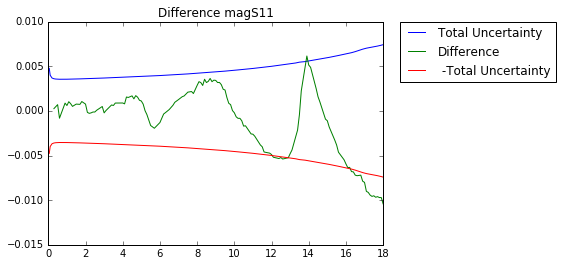

In [6]:
difference=frequency_model_difference(new_calrep_two_port,old_calrep_two_port.joined_table)
plt.plot(new_calrep_two_port["Frequency"],np.array(new_calrep_two_port["uMgS11"]),label="Total Uncertainty")
plt.plot(difference["Frequency"],difference["magS11"],label="Difference")
plt.plot(new_calrep_two_port["Frequency"],-1*np.array(new_calrep_two_port["uMgS11"]),label=" -Total Uncertainty")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Difference magS11")

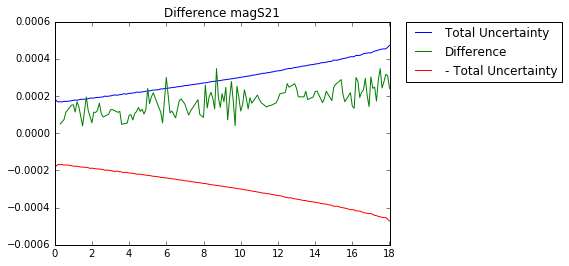

In [7]:
plt.plot(new_calrep_two_port["Frequency"],np.array(new_calrep_two_port["uMgS21"]),label="Total Uncertainty")
plt.plot(difference["Frequency"],difference["magS21"],label="Difference")
plt.plot(new_calrep_two_port["Frequency"],-1*np.array(new_calrep_two_port["uMgS21"]),label="- Total Uncertainty")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Difference magS21")

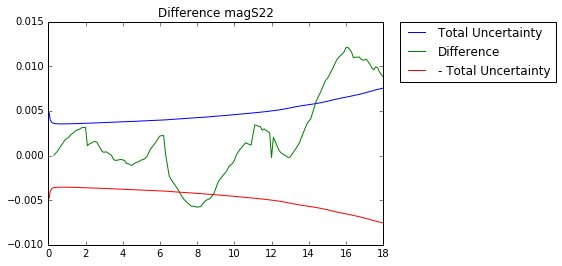

In [8]:
plt.plot(new_calrep_two_port["Frequency"],np.array(new_calrep_two_port["uMgS22"]),label="Total Uncertainty")
plt.plot(difference["Frequency"],difference["magS22"],label="Difference")
plt.plot(new_calrep_two_port["Frequency"],-1*np.array(new_calrep_two_port["uMgS22"]),label="- Total Uncertainty")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.title("Difference magS22")

The self.metadata["Device_Id"] variable is CTN102


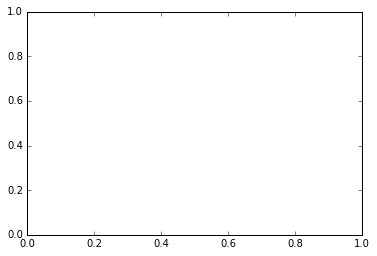

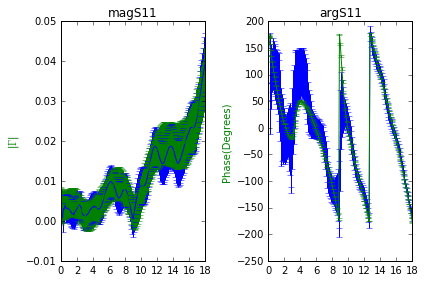

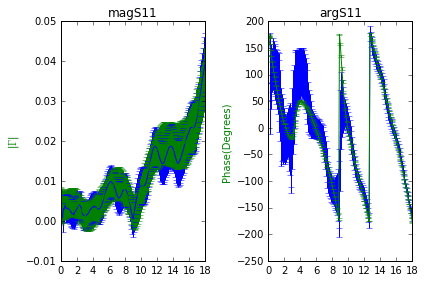

In [9]:
plt.hold(False)
plt.close()
old_calrep=OnePortCalrepModel(os.path.join(r"C:\Share\ascii.dut\2014",'CTN102.asc'))
raw=OnePortRawModel(os.path.join(r"C:\Share\Ck_Std_raw_ascii",'CTN102.R5_061913'))
new_calrep=calrep(raw)
plot_calrep_comparision([old_calrep,new_calrep])

In [10]:
from pyMeasure.Code.DataHandlers.GraphModels import *

In [11]:
image_graph=ImageGraph()

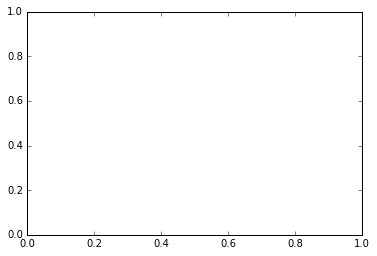

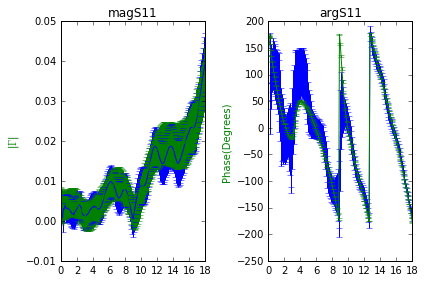

In [12]:
image_graph.set_state("MatplotlibFigure",plot_calrep_comparision([old_calrep,new_calrep]))

In [13]:
image_graph.move_to_node("embededHTML")

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embededHTML


In [14]:
html=image_graph.data

In [15]:
out_file=open("test.html",'w')
out_file.write(html)
out_file.close()

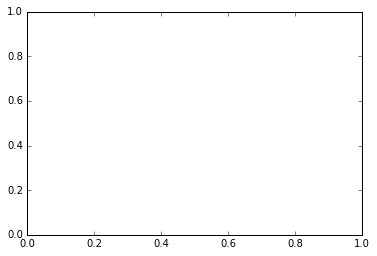

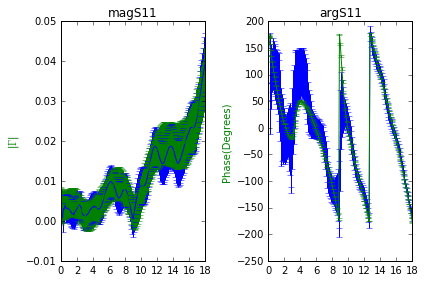

In [16]:
fig=plot_calrep_comparision([old_calrep,new_calrep])

In [17]:
import matplotlib
from types import *
type(fig)==matplotlib.figure.Figure
len([])
type(image_graph)==ImageGraph

True

In [18]:
def list_MatplotlibFigure_to_EmbededHTML_file(list_of_matplotlib_figures,file_name="test.html"):
    """Turns a list of matplotlib figures into a file of embeded html images"""
    new_graph=ImageGraph()
    out_contents=""
    for figure in list_of_matplotlib_figures:
        new_graph.set_state("MatplotlibFigure",figure)
        new_graph.move_to_node("embededHTML")
        html=new_graph.data
        out_contents=out_contents+"\n"+html
    out_file=open(file_name,"w")
    out_file.write(out_contents)
    out_file.close()
    return file_name  
def list_MatplotlibFigure_to_EmbededHTML_string(list_of_matplotlib_figures):
    """Turns a list of matplotlib figures into a file of embeded html images"""
    new_graph=ImageGraph()
    out_contents=""
    for figure in list_of_matplotlib_figures:
        new_graph.set_state("MatplotlibFigure",figure)
        new_graph.move_to_node("embededHTML")
        html=new_graph.data
        out_contents=out_contents+"\n"+html
    return out_contents 

In [19]:
list_MatplotlibFigure_to_EmbededHTML_file([fig,type_b_figure,SNIST_figure])

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embededHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embededHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embededHTML


'test.html'

In [20]:
from pyMeasure.Code.DataHandlers.Translations import *

In [23]:
import lxml.html.builder

In [24]:
html=lxml.html.builder.HTML(lxml.html.builder.BODY(list_MatplotlibFigure_to_EmbededHTML_string([fig,type_b_figure,SNIST_figure])))

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embededHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embededHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embededHTML


In [32]:
out_string=lxml.html.tostring(html)
#print out_string
#html_string_to_pdf_file(out_string)

In [22]:
html_string_to_pdf_file(list_MatplotlibFigure_to_EmbededHTML_string([fig,type_b_figure,SNIST_figure]))

['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embededHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embededHTML
['edge_MatplotlibFigure_png_000', 'edge_png_base64_000', 'edge_base64_embededHTML_000']
moving MatplotlibFigure -> png
moving png -> base64
moving base64 -> embededHTML
Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


'test.pdf'

In [34]:
html_file_to_pdf_file(os.path.join("Calrep_Comparision_20161212_002.html")

Loading pages (1/6)
Counting pages (2/6)                                               
Resolving links (4/6)                                                       
Loading headers and footers (5/6)                                           
Printing pages (6/6)
Done                                                                      


'test.pdf'

In [ ]:
def UDT(start_resource,end_resource,graph):
    """Maps a start_resource to a end_resource using graph. Graph specification can be a string or child class of Graph
    For example: to map a matplotlib figure to a EmbeddedHTML image
    img=UDT(figure,"EmbeddedHTML","image"), or if a graph already exists just pass the graph."""
    # put all the graph definitions here
    graph_types=
    if type(graph) is StringType:
        # here load the class names from the module pyMeasure.Code.DataHandlers.GraphModels 
        class_names=["ImageGraph"]
        possible_graphs=[]
        for class_name in class_names:
            if re.search(graph,class_name,re.IGNORECASE):
                possible_graphs.append(class_name)
        if len(possible_graphs)>1:
            print("The graph is not well determined, it could be any of {0}".format(possible_graphs))
            print("Please make the string more specific or pass a graph object")
            return None
        elif len(possible_graphs)==0:
            print("No Current Graph Models Match That Description Please Choose One Of :"+
                  "\n{0}\n And try again".format(class_names))
            return None
        else: # len(possible_graphs)==1
            graph_class=possible_graphs[0]
            graph=globals().__dict__[graph_class]()
    elif type(graph) in graph_types:
        
            